# Air Traffic Data Analysis - Student Exercise
## Inferential Statistics and Regression Analysis

**Student Template - Complete the TODO sections**

In this exercise, you will analyze air traffic data using inferential statistics and regression techniques. Follow the instructions and complete each section marked with `#TODO`.

### Dataset Description:
- **Dom_Pax**: Domestic Air Travel Passengers
- **Int_Pax**: International Air Travel Passengers  
- **Pax**: Total Air Travel Passengers
- **Dom_Flt**: Number of Flights (Domestic)
- **Int_Flt**: Number of Flights (International)
- **Flt**: Number of Flights (Total)
- **Dom_RPM**: Revenue Passenger-miles (Domestic)

## 1. Setup and Data Loading

In [6]:

import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler


# Set up plotting style (optional)
plt.style.use('default')
sns.set_palette("husl")

In [9]:
# TODO: Load the dataset
# Hint: Use pd.read_csv() to load 'air_traffic_data.csv'
# If the file doesn't exist, the code below will create sample data for you

try:
    # Your code to load the dataset:
    df = pd.read_csv('air_traffic_data.csv')
    print("Dataset loaded successfully!")
    print(f"Shape: {df.shape}")
except FileNotFoundError:
    print("Creating sample air traffic data...")
    import numpy as np
    import pandas as pd

    # Create sample data
    np.random.seed(42)
    n_samples = 200

    # Generate correlated data
    dom_flights = np.random.normal(15000, 3000, n_samples)
    int_flights = np.random.normal(8000, 2000, n_samples)

    dom_pax = dom_flights * np.random.normal(12, 2, n_samples) + np.random.normal(0, 10000, n_samples)
    int_pax = int_flights * np.random.normal(15, 3, n_samples) + np.random.normal(0, 15000, n_samples)

    dom_rpm = dom_pax * np.random.normal(800, 100, n_samples)

    # Ensure positive values
    dom_flights = np.abs(dom_flights)
    int_flights = np.abs(int_flights)
    dom_pax = np.abs(dom_pax)
    int_pax = np.abs(int_pax)
    dom_rpm = np.abs(dom_rpm)

    df = pd.DataFrame({
        'Dom_Flt': dom_flights.astype(int),
        'Int_Flt': int_flights.astype(int),
        'Flt': (dom_flights + int_flights).astype(int),
        'Dom_Pax': dom_pax.astype(int),
        'Int_Pax': int_pax.astype(int),
        'Pax': (dom_pax + int_pax).astype(int),
        'Dom_RPM': dom_rpm.astype(int)
    })

    print("Sample data created successfully!")
    print(f"Shape: {df.shape}")

Creating sample air traffic data...
Sample data created successfully!
Shape: (200, 7)


## 2. Exploratory Data Analysis

In [18]:
# TODO: Display basic information about the dataset
# Hint: Use df.info(), df.head(), and df.describe() to explore the data

print("Dataset Info:")
df.info()


print("\nFirst 5 rows:")
print(df.head())


print("\nBasic Statistics:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Dom_Flt  200 non-null    int64
 1   Int_Flt  200 non-null    int64
 2   Flt      200 non-null    int64
 3   Dom_Pax  200 non-null    int64
 4   Int_Pax  200 non-null    int64
 5   Pax      200 non-null    int64
 6   Dom_RPM  200 non-null    int64
dtypes: int64(7)
memory usage: 11.1 KB

First 5 rows:
   Dom_Flt  Int_Flt    Flt  Dom_Pax  Int_Pax     Pax    Dom_RPM
0    16490     8715  25205   152866   176257  329123  124207802
1    14585     9121  23706   148316   136571  284888  112284645
2    16943    10166  27109   212190   156317  368508  172347465
3    19569    10107  29676   250224   127892  378116  213773981
4    14297     5244  19542   162835    82306  245142  131063749

Basic Statistics:
            Dom_Flt       Int_Flt  ...            Pax       Dom_RPM
count    200.000000    200.000000

In [20]:
# TODO: Check for missing values and handle them if necessary
# Hint: Use df.isnull().sum() to check for missing values
# If there are missing values, decide whether to drop them (dropna()) or fill them (fillna())

print("Missing values:")
df.isna().sum()


# Handle missing values if any (uncomment and complete if needed)
# if df.isnull().sum().sum() > 0:
#     print("\nHandling missing values...")
#     df = # TODO: Complete this line (use dropna() or fillna())
#     print(f"New shape after handling missing values: {df.shape}")

Missing values:


Dom_Flt    0
Int_Flt    0
Flt        0
Dom_Pax    0
Int_Pax    0
Pax        0
Dom_RPM    0
dtype: int64


Correlation Matrix:
          Dom_Flt   Int_Flt       Flt   Dom_Pax   Int_Pax       Pax   Dom_RPM
Dom_Flt  1.000000  0.095161  0.834910  0.664181  0.024392  0.513322  0.559946
Int_Flt  0.095161  1.000000  0.627340  0.040427  0.665554  0.466015  0.028555
Flt      0.834910  0.627340  1.000000  0.541947  0.387060  0.659231  0.453840
Dom_Pax  0.664181  0.040427  0.541947  1.000000  0.010837  0.755916  0.901617
Int_Pax  0.024392  0.665554  0.387060  0.010837  1.000000  0.662822 -0.004699
Pax      0.513322  0.466015  0.659231  0.755916  0.662822  1.000000  0.672074
Dom_RPM  0.559946  0.028555  0.453840  0.901617 -0.004699  0.672074  1.000000


<Figure size 1000x800 with 0 Axes>

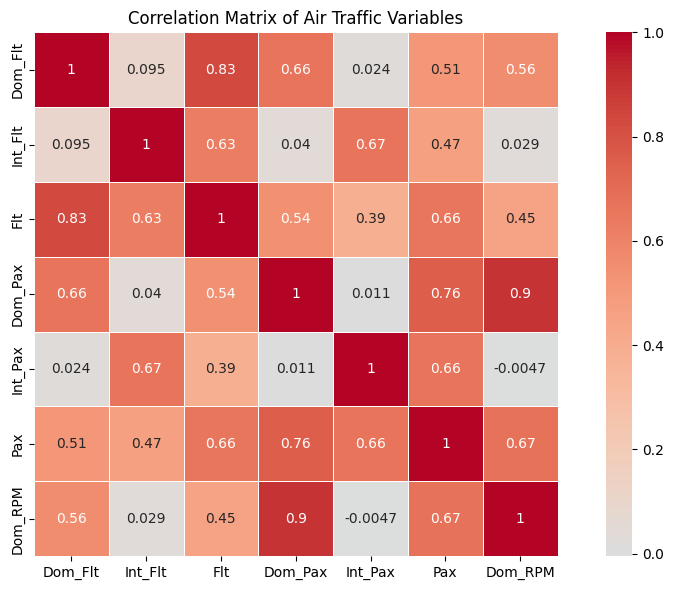

Strongest correlations:
 - 0.9 - DOM_RPM/DOM_PAX
 - 0.83 - Flt/Dom_Flt
 - 0.76 - Pax/Dom_Pax
 - 0.67 -Int_Flt/Int_Pax
  


In [32]:
# TODO: Create and analyze correlation matrix
# Hint: Use df.corr() to calculate correlations and sns.heatmap() to visualize

plt.figure(figsize=(10, 8))
# Calculate correlation matrix:
correlation_matrix = df.corr(numeric_only=True)
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Create heatmap:
# TODO: Use sns.heatmap() with parameters: annot=True, cmap='coolwarm', center=0, square=True, linewidths=0.5
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True, linewidths=0.5)

plt.title('Correlation Matrix of Air Traffic Variables')
plt.tight_layout()
plt.show()

# TODO: Find and print the strongest correlations
# Hint: Look at the correlation matrix values (excluding diagonal)
print("Strongest correlations:\n - 0.9 - DOM_RPM/DOM_PAX\n - 0.83 - Flt/Dom_Flt\n - 0.76 - Pax/Dom_Pax\n - 0.67 -Int_Flt/Int_Pax\n  ")



## 3. Hypothesis Testing

In [35]:
# TODO: Hypothesis Test 1 - Compare domestic and international passengers
# Hint: Use stats.ttest_ind() to perform independent t-test

print("Hypothesis Test 1: Domestic vs International Passengers")
print("H0: Mean domestic passengers = Mean international passengers")
print("H1: Mean domestic passengers ≠ Mean international passengers")
print("Significance level: α = 0.05")

# Perform the t-test:
t_stat, p_value = stats.ttest_ind(dom_pax,int_pax)

print(f"\nResults:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.6f}")

# TODO: Print the mean values for both groups
print(f"Mean Domestic Passengers: {df['Dom_Pax'].mean():.0f}")
print(f"Mean International Passengers: {df['Int_Pax'].mean():.0f}")

# TODO: Interpret the results
# Hint: Compare p_value with alpha (0.05) to make a decision
alpha = 0.05
if p_value < alpha:
    # TODO: Complete the conclusion for rejecting H0
    print(f"\nConclusion: Reject H0 (p < {alpha})")
    print("There is a significant difference bwetween these two groups.")
else:
    # TODO: Complete the conclusion for failing to reject H0
    print(f"\nConclusion: Fail to reject H0 (p >= {alpha})")
    print("There is no significant difference bwetween these two groups")

Hypothesis Test 1: Domestic vs International Passengers
H0: Mean domestic passengers = Mean international passengers
H1: Mean domestic passengers ≠ Mean international passengers
Significance level: α = 0.05

Results:
T-statistic: 11.4891
P-value: 0.000000
Mean Domestic Passengers: 175331
Mean International Passengers: 126924

Conclusion: Reject H0 (p < 0.05)
There is a significant difference bwetween these two groups.


In [38]:
# TODO: Hypothesis Test 2 - Test correlation between total passengers and total flights
# Hint: Use stats.pearsonr() to test correlation significance

print("\nHypothesis Test 2: Correlation between Total Passengers and Total Flights")
print("H0: There is no correlation between total passengers and total flights (ρ = 0)")
print("H1: There is a correlation between total passengers and total flights (ρ ≠ 0)")
print("Significance level: α = 0.05")

# Perform correlation test:
x = df["Flt"].astype(float).to_numpy()
y = df["Pax"].astype(float).to_numpy()
mask = np.isfinite(x) & np.isfinite(y)
correlation_coef, p_value_corr = stats.pearsonr(x[mask], y[mask])

print(f"\nResults:")
print(f"Correlation coefficient: {correlation_coef:.4f}")
print(f"P-value: {p_value_corr:.6f}")

# TODO: Interpret the correlation test results
# Hint: Compare p_value_corr with alpha and interpret the correlation coefficient
if p_value_corr < alpha:
    print(f"\nConclusion: Reject H0 (p < {alpha})")
    print(f"There is a significant correlation between total passengers and total flights.")
    # TODO: Add interpretation about positive/negative correlation
    if correlation_coef > 0:
        print("As total flights increase, total passengers tend to increase as well")
    else:
        print("When total flights go up, total passengers tend to go down (and vice-versa)")
else:
    print(f"\nConclusion: Fail to reject H0 (p >= {alpha})")
    print("# TODO: Add your interpretation here")


Hypothesis Test 2: Correlation between Total Passengers and Total Flights
H0: There is no correlation between total passengers and total flights (ρ = 0)
H1: There is a correlation between total passengers and total flights (ρ ≠ 0)
Significance level: α = 0.05

Results:
Correlation coefficient: 0.6592
P-value: 0.000000

Conclusion: Reject H0 (p < 0.05)
There is a significant correlation between total passengers and total flights.
As total flights increase, total passengers tend to increase as well


## 4. Simple Linear Regression

In [48]:
# TODO: Build a simple linear regression model
# Goal: Predict Total Passengers from Total Flights
# Hint: Use sklearn's LinearRegression class

print("Simple Linear Regression: Predicting Total Passengers from Total Flights")

# Prepare the data:
X_simple =  df[["Flt"]]
y_simple = df["Pax"]

# Split the data:
# TODO: Use train_test_split with test_size=0.2, random_state=42
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple,y_simple,test_size=0.2, random_state=42)

# Create and train the model:

simple_model = LinearRegression()
simple_model.fit(X_train_simple, y_train_simple)


# Make predictions:
y_pred = simple_model.predict(X_test_simple)

r2_simple  = r2_score(y_test_simple, y_pred)
mse_simple = mean_squared_error(y_test_simple, y_pred)
mae_simple = mean_absolute_error(y_test_simple, y_pred)
rmse_simple = np.sqrt(mse_simple)

print(f"\nModel Performance:")
print(f"R² Score: {r2_simple:.4f}")
print(f"Mean Squared Error: {mse_simple:.2f}")
print(f"Root Mean Squared Error: {rmse_simple:.2f}")
print(f"Mean Absolute Error: {mae_simple:.2f}")

# TODO: Print the model equation
# Hint: Use simple_model.intercept_ and simple_model.coef_[0]
print(f"\nModel Equation: Passengers = {simple_model.intercept_:.2f} + {simple_model.coef_[0]:.2f} × Flights")

Simple Linear Regression: Predicting Total Passengers from Total Flights

Model Performance:
R² Score: 0.2977
Mean Squared Error: 2141846835.14
Root Mean Squared Error: 46280.09
Mean Absolute Error: 36607.08

Model Equation: Passengers = 37484.48 + 11.45 × Flights


Summary:
- Flights are positively related to passengers (as flights increase, passengers tend to increase).

- But flights alone don’t capture most of the signal (seasonality, aircraft size, load factor, route mix, etc. matter).

/Users/lizarabkina/Desktop/DI_Data_analysis_course_2025/DI-Bootcamp/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


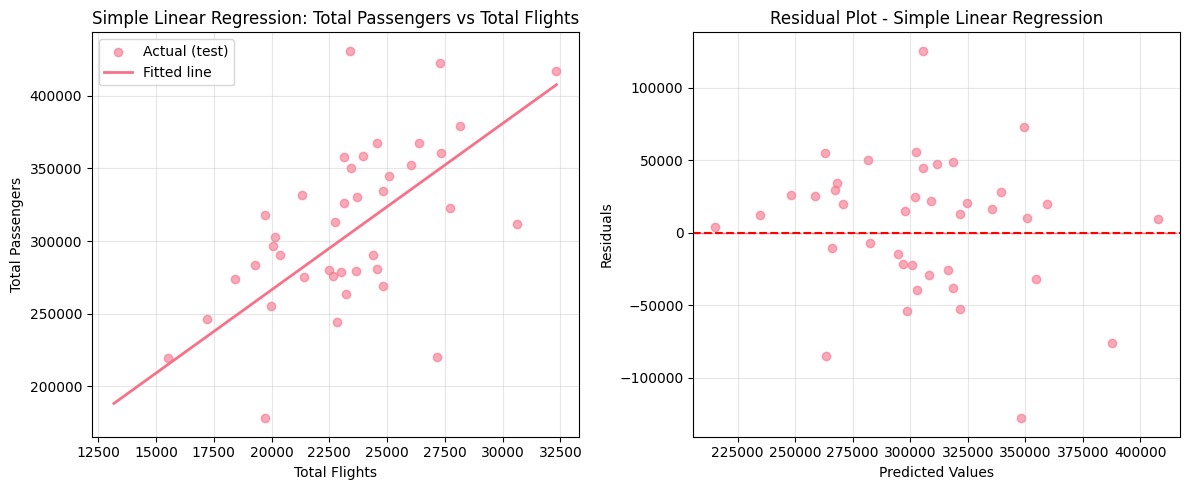

In [51]:
# Visualize the simple linear regression results
# Create two plots: scatter plot with regression line and residual plot

# Plot 1: Scatter plot with regression line
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
#  Create scatter plot of actual vs predicted values
# Hint: Use plt.scatter() for actual and predicted points, and plt.plot() for the line
plt.scatter(X_test_simple["Flt"], y_test_simple, alpha=0.6, label="Actual (test)")
x_line = np.linspace(df["Flt"].min(), df["Flt"].max(), 200).reshape(-1, 1)
y_line = simple_model.predict(x_line)
plt.plot(x_line.ravel(), y_line, linewidth=2, label="Fitted line")
plt.xlabel('Total Flights')
plt.ylabel('Total Passengers')
plt.title('Simple Linear Regression: Total Passengers vs Total Flights')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Residual plot
plt.subplot(1, 2, 2)
y_pred_simple = simple_model.predict(X_test_simple)
residuals = y_test_simple - y_pred_simple

plt.scatter(y_pred_simple, residuals, alpha=0.6, label="Residuals (test)")
plt.axhline(0, linestyle="--", linewidth=1)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot - Simple Linear Regression')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Multiple Linear Regression

In [52]:
# TODO: Build a multiple linear regression model
# Goal: Predict Total Passengers using multiple features
# Hint: Avoid using Pax in features since that's our target (multicollinearity)

print("Multiple Linear Regression: Predicting Total Passengers from Multiple Features")

# TODO: Select appropriate features
# Hint: Use columns like Dom_Pax, Int_Pax, Dom_Flt, Int_Flt, Dom_RPM (avoid Pax and Flt)
feature_columns = ["Dom_Flt", "Int_Flt"]   # avoid Pax, Dom_Pax, Int_Pax, Dom_RPM, Flt
X_multiple = df[feature_columns]
y_multiple = df["Pax"]


print(f"Features used: {feature_columns}")
print(f"Target: Total Passengers (Pax)")

# TODO: Split the data
# Hint: Use train_test_split with test_size=0.2, random_state=42
X_train_mult, X_test_mult, y_train_mult, y_test_mult = train_test_split(
    X_multiple, y_multiple, test_size=0.2, random_state=42
)

# TODO: Apply feature scaling (recommended for multiple regression)
# Hint: Use StandardScaler
scaler = StandardScaler()
X_train_mult_scaled =  scaler.fit_transform(X_train_mult)
X_test_mult_scaled = scaler.transform(X_test_mult)

# TODO: Create and train the multiple regression model
multiple_model = LinearRegression()
multiple_model.fit(X_train_mult_scaled, y_train_mult)


# TODO: Make predictions
y_pred_mult = multiple_model.predict(X_test_mult_scaled)


# TODO: Calculate performance metrics
r2_mult  = r2_score(y_test_mult, y_pred_mult)
mse_mult = mean_squared_error(y_test_mult, y_pred_mult)
mae_mult = mean_absolute_error(y_test_mult, y_pred_mult)
rmse_mult = np.sqrt(mse_mult)

print(f"\nModel Performance:")
print(f"R² Score: {r2_mult:.4f}")
print(f"Mean Squared Error: {mse_mult:.2f}")
print(f"Root Mean Squared Error: {rmse_mult:.2f}")
print(f"Mean Absolute Error: {mae_mult:.2f}")

# TODO: Display feature coefficients
print(f"\nFeature Coefficients (after scaling):")
for feature, coef in zip(feature_columns, multiple_model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {multiple_model.intercept_:.2f}")

Multiple Linear Regression: Predicting Total Passengers from Multiple Features
Features used: ['Dom_Flt', 'Int_Flt']
Target: Total Passengers (Pax)

Model Performance:
R² Score: 0.3109
Mean Squared Error: 2101445473.73
Root Mean Squared Error: 45841.53
Mean Absolute Error: 36172.12

Feature Coefficients (after scaling):
Dom_Flt: 30424.5557
Int_Flt: 24321.1051
Intercept: 300303.27


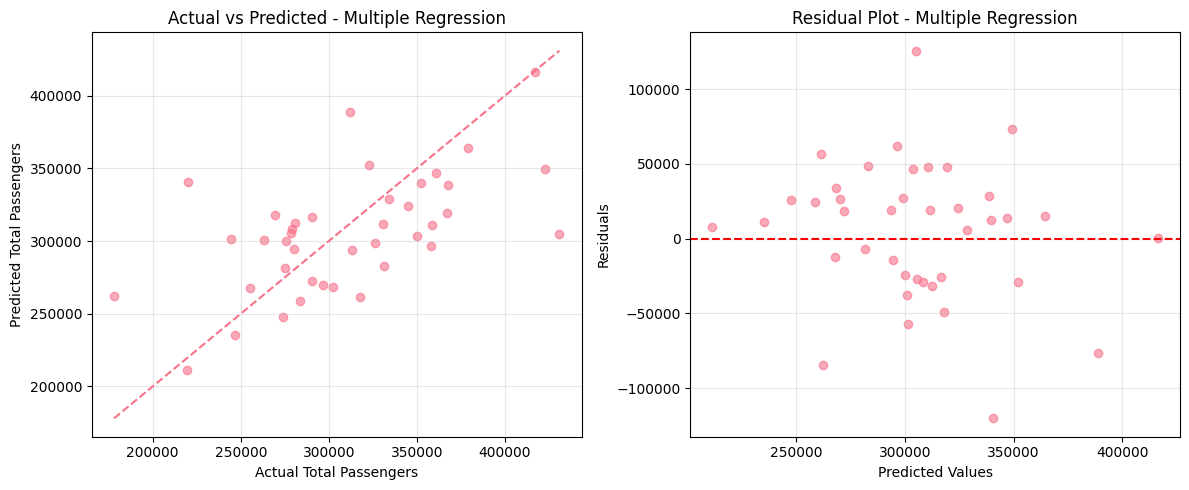

In [53]:
# TODO: Visualize multiple regression results
# Create actual vs predicted plot and residual plot

plt.figure(figsize=(12, 5))

# Plot 1: Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test_mult, y_pred_mult, alpha=0.6, label="Test points")
lo = min(y_test_mult.min(), y_pred_mult.min())
hi = max(y_test_mult.max(), y_pred_mult.max())
plt.plot([lo, hi], [lo, hi], linestyle="--", linewidth=1.5, label="Perfect prediction")
plt.xlabel('Actual Total Passengers')
plt.ylabel('Predicted Total Passengers')
plt.title('Actual vs Predicted - Multiple Regression')
plt.grid(True, alpha=0.3)

# Plot 2: Residual plot
plt.subplot(1, 2, 2)
residuals_mult = y_test_mult - y_pred_mult  # actual - predicted
plt.scatter(y_pred_mult, residuals_mult, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot - Multiple Regression')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Model Comparison and Analysis

In [56]:
#  Compare the performance of both models
# Create a comparison table and determine which model performs better

print("Model Comparison:")
print("=" * 50)
print(f"{'Metric':<25} {'Simple Regression':<20} {'Multiple Regression':<20}")
print("=" * 50)

print(f"{'R²':<25} {r2_simple:<20.4f} {r2_mult:<20.4f}")
print(f"{'RMSE':<25} {rmse_simple:<20.2f} {rmse_mult:<20.2f}")
print(f"{'MAE':<25} {mae_simple:<20.2f} {mae_mult:<20.2f}")
print("=" * 50)


# TODO: Determine which model performs better based on R²
# Calculate the improvement percentage
baseline = r2_simple if r2_simple != 0 else 1e-8 
if r2_mult > r2_simple:
    better_model = "Multiple Regression"
    improvement = (r2_mult - r2_simple) / abs(baseline) * 100
else:
    better_model = "Simple Regression"
    improvement = (r2_simple - r2_mult) / abs(baseline) * 100

print(f"\nBest Model: {better_model}")
print(f"R² Improvement: {improvement:.2f}%")

Model Comparison:
Metric                    Simple Regression    Multiple Regression 
R²                        0.2977               0.3109              
RMSE                      46280.09             45841.53            
MAE                       36607.08             36172.12            

Best Model: Multiple Regression
R² Improvement: 4.45%


## 7. Statistical Insights and Conclusions

In [58]:
# TODO: Summarize your findings and provide insights
# Include results from hypothesis tests, regression analysis, and key findings

print("STATISTICAL INSIGHTS AND CONCLUSIONS")
print("=" * 60)

print("\n1. HYPOTHESIS TESTING RESULTS:")
# TODO: Summarize your hypothesis test results
print(f"   • Domestic vs International Passengers: Reject H0 (p < 0.05).")
print(f"   • Mean domestic passengers is significantly higher than mean international.")
print("    • Correlation between Total Passengers and Flights: Reject H0 (p < 0.05).")
print("    • There is a significant positive correlation: more flights → more passengers.")

print("\n2. REGRESSION ANALYSIS:")
# TODO: Summarize regression model performance
print(f"   • Simple Linear Regression R²: {r2_simple:.3f} "
      f"(~{r2_simple*100:.0f}% of passenger variation explained by total flights alone).")
print(f"   • Multiple Linear Regression R²: {r2_mult:.3f} "
      f"(~{r2_mult*100:.0f}% explained using Dom_Flt and Int_Flt).")
print(f"   • Best performing model: {better_model} "
      f"(R² improvement vs simple ≈ {improvement:.2f}%).")

print("\n3. KEY FINDINGS:")
# TODO: Identify and discuss key findings from your analysis
print("   • Flights matter, but not enough: ~30–31% of variation is explained → large room for improvement.")
print("   • Relationship is positive: as flights increase, passengers generally increase.")
print("   • Errors are sizable and uneven across the range (residual “fan”), suggesting missing features and/or")
print("     a need for transformation (e.g., log target).")

print("\n4. RECOMMENDATIONS:")
# TODO: Provide practical recommendations based on your analysis
print("   • Add safe predictors (no leakage): Dom_Flt, Int_Flt, month/season dummies, holiday flags;")
print("     consider airport/route indicators if available.")
print("   • Try modeling log(Pax) or Pax per flight to reduce uneven error spread; consider a quadratic term for Flt.")
print("   • Use robust regression (e.g., HuberRegressor) to reduce outlier influence and re-check residuals.")

STATISTICAL INSIGHTS AND CONCLUSIONS

1. HYPOTHESIS TESTING RESULTS:
   • Domestic vs International Passengers: Reject H0 (p < 0.05).
   • Mean domestic passengers is significantly higher than mean international.
    • Correlation between Total Passengers and Flights: Reject H0 (p < 0.05).
    • There is a significant positive correlation: more flights → more passengers.

2. REGRESSION ANALYSIS:
   • Simple Linear Regression R²: 0.298 (~30% of passenger variation explained by total flights alone).
   • Multiple Linear Regression R²: 0.311 (~31% explained using Dom_Flt and Int_Flt).
   • Best performing model: Multiple Regression (R² improvement vs simple ≈ 4.45%).

3. KEY FINDINGS:
   • Flights matter, but not enough: ~30–31% of variation is explained → large room for improvement.
   • Relationship is positive: as flights increase, passengers generally increase.
   • Errors are sizable and uneven across the range (residual “fan”), suggesting missing features and/or
     a need for tran

## 8. Reflection Questions

**Answer the following questions based on your analysis:**

1. **Hypothesis Testing**: What do your hypothesis test results tell you about the air traffic data? Were the results expected?

- Domestic vs International: domestic passengers are higher on average, and the difference is real (p-value is tiny).

- Passengers vs Flights: there is a positive link — when flights go up, passengers usually go up too.

- Was this expected? Yes. More flights usually means more people are flying, and domestic traffic is often busier.

2. **Model Performance**: Which regression model performed better and why? What does the R² value tell you?

- The multiple regression (using Dom_Flt and Int_Flt) did a little better than the simple one (using only Flt).

- R² ≈ 0.31 means the model explains about 31% of how passengers change. The other ~69% is due to things we didn’t include (season, holidays, plane size, load factor, routes, etc.).

3. **Correlations**: What were the strongest correlations you found? How might these relationships be useful for airlines?

Strongest ones:

- Dom_RPM with Dom_Pax (very strong — they’re closely related).

- Flt with Dom_Flt (strong — total flights track domestic flights).

- Pax with Dom_Pax and with Int_Pax (more passengers in parts → more total).

- Why useful? They help airlines guess demand and decide where to add or reduce flights.

4. **Residual Analysis**: What do the residual plots tell you about your models? Are there any patterns that suggest model improvements?

- Points are scattered around zero → on average the model isn’t always too high or too low.

- The spread is big, and sometimes bigger for larger values → flights alone don’t explain everything.

- What to improve: add more info (month/season, holidays), or try changing the target (e.g., use log(Pax)) to make errors more even.

5. **Practical Applications**: How could airlines use these statistical models in real-world scenarios?

- Forecast demand (how many passengers to expect).

- Plan capacity (how many flights, which plane size).

- Plan seasons/holidays (add features for months and events).

- What-if checks (“If we add 50 flights, about how many more passengers might we get?” — remembering the model only explains part of the story).